# Classwork Example for 10 15 2020



(1) Find the equilibrium temperature at which you have a balance between heating and cooling in the neutral ISM, if you only consider C+. How does this compare to the temperature of the CNM?
* You can assume that $\alpha_C=10^{-17}$ m$^3$ s$^{-1}$

(2) Using the expressions given in the lecture notes, compare the cooling rate for both C+ and O+ for the typical conditions in the WNM, CNM, and WIM. 
* Assume the fractional ionization is $10^{-4}$ in the CNM, 0.018 in the WNM, and 1 in the WIM. 
* Also assume that [O/H] is $10^{-4}$ and [C/H] is $3\times10^{-5}$.


(3) Assuming that the ideal gas law is a good description for the ISM gas, do observations show that the assumption that the CNM and WNM are in pressure equilibrium is a good one? What if you compare these to the molecular clouds?



In [2]:
import numpy as np                          # I use this for maths and sometimes arrays.
                                            # "np" is just an abbreviation since we call this package so often!
import pylab                                # I use this for arrays and plotting sometimes
import matplotlib
import matplotlib.pyplot as plt                    # Standard plotting package
import scipy

from astropy import units as u              # This one helps with unit conversion
from astropy.io import fits


                                            # Super important!! 
                                            # This embeds plots in the Jupyter window 
                                            # (instead of showing them as pop-ups)
%matplotlib inline                             

plt.rc('font', family='sans-serif')  # Set plot fonts
plt.rc('text', usetex=True)      
#plt.rc('text', usetex=False)        # This is a quick fix if you don't have latex on your computer


## Solution:

(0, 1e-35)

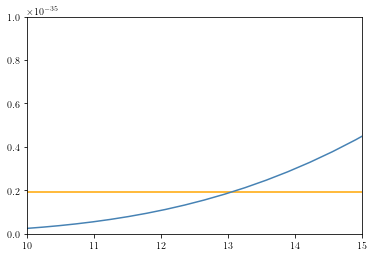

In [5]:
#1 

T = np.logspace(1,1.5,num=50)
alpha_C = 10**-17 * u.m **3 / u.s
E = 1.2 * u.eV
Heat = E * alpha_C
#print(Heat.si)

pylab.figure(1)
pylab.axhline(Heat.si.value,color='orange')
pylab.plot(T,8e-33 * T**-0.5 * np.exp(-92/T),color='steelblue'); # Cooling function, already in SI units of m^3 W
pylab.xlim(10,15)
pylab.ylim(0,1e-35)


### From the plot, we can see that $T_{eq}\sim$ 13 K 

In [12]:
#2 

#CNM:
T = 75
n_H = 30 * 1e6 # convert to per m^-3
n_C = 3e-5 * n_H
n_O = 1e-4 * n_H
n_e = 1e-4 * n_H
y_Cp = 1e-4
y_Op = 1e-4


Lambda_Cp = 8*10**-33*y_Cp * n_C * n_e * T**-0.5 * np.exp(-92/T)
Lambda_Op = 1.833*10**-30*y_Op * n_O * n_e * T**-0.5 * np.exp(-3.89*10**4/T)

print('')
print('Cold Neutral Medium:')
print('')
print('Lambda[C+]: %1.2e'%Lambda_Cp)
print('Lambda[O+]: %1.2e'%Lambda_Op)


#WNM:
T = 7000
n_H = 0.3 * 1e6 # convert to per m^-3
n_C = 3e-5 * n_H
n_O = 1e-4 * n_H
n_e = 0.018 * n_H
y_Cp = 0.018
y_Op = 0.018


Lambda_Cp = 8*10**-33*y_Cp * n_C * n_e * T**-0.5 * np.exp(-92/T)
Lambda_Op = 1.833*10**-30*y_Op * n_O * n_e * T**-0.5 * np.exp(-3.89*10**4/T)

print('')
print('Warm Neutral Medium:')
print('')
print('Lambda[C+]: %1.2e'%Lambda_Cp)
print('Lambda[O+]: %1.2e'%Lambda_Op)

#WIM
T = 10000
n_H = 0.3 * 1e6 # convert to per m^-3
n_C = 3e-5 * n_H
n_O = 1e-4 * n_H
n_e = 1 * n_H
y_Cp = 1
y_Op = 1


Lambda_Cp = 8*10**-33*y_Cp * n_C * n_e * T**-0.5 * np.exp(-92/T)

Lambda_Op = 1.833*10**-30*y_Op * n_O * n_e * T**-0.5 * np.exp(-3.89*10**4/T)

print('')
print('Warm Ionized Medium:')
print('')
print('Lambda[C+]: %1.2e'%Lambda_Cp)
print('Lambda[O+]: %1.2e'%Lambda_Op)


Cold Neutral Medium:

Lambda[C+]: 7.31e-32
Lambda[O+]: 1.06e-253

Warm Neutral Medium:

Lambda[C+]: 8.26e-32
Lambda[O+]: 2.47e-31

Warm Ionized Medium:

Lambda[C+]: 2.14e-28
Lambda[O+]: 3.37e-27


In [15]:
#3

#Define pressure as p/k and ignore units so we can just multiply n * T:

P_mol = 1e4 * 20
P_CNM = 30 * 75
P_WNM = 0.3 * 7000
P_WIM = 0.3 * 10000

print('Pressure(Molecular Gas): %1.1e K / cm^3'%P_mol)
print('Pressure(Cold Neutral): %1.1e K / cm^3'%P_CNM)
print('Pressure(Warm Neutral): %1.1e K / cm^3'%P_WNM)
print('Pressure(Warm Ionized): %1.1e K / cm^3'%P_WIM)



Pressure(Molecular Gas): 2.0e+05 K / cm^3
Pressure(Cold Neutral): 2.2e+03 K / cm^3
Pressure(Warm Neutral): 2.1e+03 K / cm^3
Pressure(Warm Ionized): 3.0e+03 K / cm^3


### The molecular gas is way out of (thermal) presure equilibrium, but the other 3 are in approximate pressure equilibrium. 

### This is because unlike the other 3 phases, the molecular gas is generally gravitationally bound, which allows it to reach a higher pressure
